In [19]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

from google.colab import files

In [20]:
x = [-1,0,1,2,3,4]
y = [-3,-1,1,3,5,7]

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd',loss='mean_squared_error')
model.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 277ms/step - loss: 26.5382
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 21.1764
Epoch 3/500
1/1 [==============================] - 0s 10ms/step - loss: 16.9518
Epoch 4/500
1/1 [==============================] - 0s 9ms/step - loss: 13.6222
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 10.9967
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 8.9254
Epoch 7/500
1/1 [==============================] - 0s 10ms/step - loss: 7.2902
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 5.9981
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 4.9762
Epoch 10/500
1/1 [==============================] - 0s 8ms/step - loss: 4.1670
Epoch 11/500
1/1 [==============================] - 0s 14ms/step - loss: 3.5251
Epoch 12/500
1/1 [==============================] - 0s 12ms/step - loss: 3.0150
Epoch 13/500
1/1 [============================

In [22]:
import pathlib
# export the savedmodel
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

In [23]:
# covert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [24]:
#save the model
tflite_model_file = pathlib.Path('/content/model.tflite')
tflite_model_file.write_bytes(tflite_model)

1064

In [25]:
# load TFlite model and allocate tensors
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [37]:
# testing our tensorflow lite model on random input data.
input_shape = input_details[0]['shape']
output_shape = output_details[0]['shape']
inputs,outputs = [], []
for _ in range(100, 100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # test the tensorflow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)

  inputs.append(input_data[0][0])
  output.append(output_data[0][0])

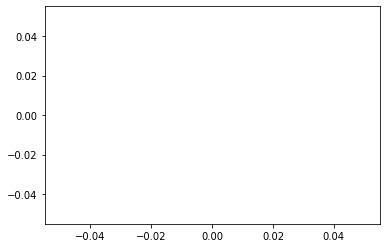

In [38]:
plt.plot(inputs, outputs, 'r')
plt.show()

In [ ]:
files.download(tflite_model_file)

In [ ]:
# quantize(to optimise our trained model)
converter = tf.lite.TFLiteconverter.from_saved_model(export_dir)
converter,optimizations = [tf.lite.optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
